#Start

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Car%20Price.csv')

In [ ]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [ ]:
df[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64

In [ ]:
df[['Fuel','Seller_Type','Transmission','Owner']].value_counts()

Fuel      Seller_Type       Transmission  Owner               
Petrol    Individual        Manual        First Owner             892
Diesel    Individual        Manual        First Owner             835
Petrol    Individual        Manual        Second Owner            454
Diesel    Individual        Manual        Second Owner            453
          Dealer            Manual        First Owner             336
Petrol    Dealer            Manual        First Owner             306
Diesel    Individual        Manual        Third Owner             142
Petrol    Individual        Manual        Third Owner             130
Diesel    Dealer            Automatic     First Owner             114
Petrol    Dealer            Automatic     First Owner              80
Diesel    Individual        Automatic     First Owner              73
Petrol    Individual        Automatic     First Owner              67
Diesel    Dealer            Manual        Second Owner             56
Petrol    Trustmark Dealer 

In [ ]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df['Seller_Type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df['Owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

#Encoding

In [ ]:
df.replace({'Fuel' : {'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4 }},inplace = True)

In [ ]:
df.replace({'Seller_Type' : {'Individual':0, 'Dealer':1, 'Trustmark Dealer' :2}},inplace = True)

In [ ]:
df.replace({'Transmission' : {'Manual':0, 'Automatic':1}},inplace = True)

In [ ]:
df.replace({'Owner' : {'First Owner':0, 'Second Owner':1, 'Fourth & Above Owner':2,
       'Third Owner':3, 'Test Drive Car':4}},inplace = True)

# feature and label

In [ ]:
y=df['Selling_Price']

In [ ]:
x=df[['Year','KM_Driven','Fuel','Seller_Type','Transmission','Owner']]

In [ ]:
x

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x,y,train_size= 0.7 ,random_state = 12529) # random_state = any number (to fixed  the combination number of random combination )

#Training model

# Linear Regression Model

In [ ]:
from sklearn.linear_model import  LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train , y_train)

LinearRegression()

In [ ]:
lr.intercept_

-79126639.46321222

In [ ]:
lr.coef_

array([ 3.94658792e+04, -6.59553187e-01,  2.16473126e+05,  9.38426811e+04,
        8.81034725e+05, -1.24479967e+04])

# Predict Test Data

In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
y_predict.shape

(1302,)

In [ ]:
y_predict

array([502313.70627782, 646343.29334275, 521992.98988277, ...,
       620068.47787154, 316849.1566079 , 731870.58361658])

# Model Accuracy 


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score  # Evaluating


In [ ]:
mean_squared_error(y_test,y_predict)

193256543581.20093

In [ ]:
mean_absolute_error(y_test,y_predict)

228731.5525310861

In [ ]:
mean_absolute_percentage_error(y_test, y_predict)

0.7280310889705737

In [ ]:
r2_score(y_test,y_predict)

0.40751473265513116

* R square is very low signifies need for model improvement

#visualization

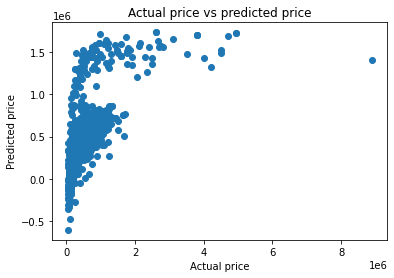

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')
plt.show()


#Get Future Predictictions

let select a random sample from existing dataset as new value
Steps to follow :

1) Extract a random row using sample function

2)Seprate x and y

3)Predict


In [ ]:
df_new = df.sample(1)

In [ ]:
df_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
1492,Chevrolet,Chevrolet Spark 1.0 LS,2010,175000,45000,0,0,0,1


In [ ]:
df_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
1492,Chevrolet,Chevrolet Spark 1.0 LS,2010,175000,45000,0,0,0,1


In [ ]:
x_new = df_new.drop(['Brand','Model','Selling_Price'],axis =1)

In [ ]:
y_pred_new = lr.predict(x_new)

In [ ]:
y_pred_new

array([157649.84625053])